### Part I, the rows required in the paper are selected from the original data

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [6]:
algo = ["FIC", "FICBS", "AIFL", "InverseCTD", "RI",
        "SOFOT", "LG1", "LG2", "ComFIL", "TRT", "SP", "CMS"]

In [2]:
SafePrecision = pd.read_excel("./SafePrecision.xlsx")
SafeRecall = pd.read_excel("./SafeRecall.xlsx")
NoSafePrecision = pd.read_excel("./NoSafePrecision.xlsx")
NoSafeRecall = pd.read_excel("./NoSafeRecall.xlsx")

D:\python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
projects = []
paths = []
with open("../exp.txt") as f:
    lines = f.readlines()
    for line in lines:
        [project, path] = line.replace("\n", "").split("/", 1)
        projects.append(project)
        paths.append(path)


SafePrecision_slice = SafePrecision.loc[(SafePrecision['project'].isin(projects)) &
                                        (SafePrecision['path'].isin(paths))].drop("path", axis=1)
SafeRecall_slice = SafeRecall.loc[(SafeRecall['project'].isin(projects)) &
                                  (SafeRecall['path'].isin(paths))].drop("path", axis=1)
NoSafePrecision_slice = NoSafePrecision.loc[(NoSafePrecision['project'].isin(projects)) &
                                            (NoSafePrecision['path'].isin(paths))].drop("path", axis=1)
NoSafeRecall_slice = NoSafeRecall.loc[(NoSafeRecall['project'].isin(projects)) &
                                      (NoSafeRecall['path'].isin(paths))].drop("path", axis=1)

In [4]:
SafePrecision_slice['N'] = SafePrecision_slice['N'].astype(int)
SafePrecision_slice[algo] = SafePrecision_slice[algo].astype(float).round(3)

SafeRecall_slice['N'] = SafeRecall_slice['N'].astype(int)
SafeRecall_slice[algo] = SafeRecall_slice[algo].astype(float).round(3)

NoSafePrecision_slice['N'] = NoSafePrecision_slice['N'].astype(int)
NoSafePrecision_slice[algo] = NoSafePrecision_slice[algo].astype(
    float).round(3)

NoSafeRecall_slice['N'] = NoSafeRecall_slice['N'].astype(int)
NoSafeRecall_slice[algo] = NoSafeRecall_slice[algo].astype(float).round(3)

KeyError: "['FIC_BS'] not in index"

In [ ]:
writer = pd.ExcelWriter("PR.xlsx")

sheetNames01 = "Precision with safe"
sheetNames02 = "Recall with safe"
sheetNames03 = "Precision without safe"
sheetNames04 = "Recall without safe"


SafePrecision_slice.to_excel(writer, sheet_name=sheetNames01, index=False)
SafeRecall_slice.to_excel(writer, sheet_name=sheetNames02, index=False)
NoSafePrecision_slice.to_excel(writer, sheet_name=sheetNames03, index=False)
NoSafeRecall_slice.to_excel(writer, sheet_name=sheetNames04, index=False)

writer.save()
writer.handles = None

### Part II, processing the selected data into a presentable form for the paper

In [ ]:
SafePrecision = pd.read_excel("./PR.xlsx", sheet_name="Precision with safe")
SafeRecall = pd.read_excel("./PR.xlsx", sheet_name="Recall with safe")
NoSafePrecision = pd.read_excel(
    "./PR.xlsx", sheet_name="Precision without safe")
NoSafeRecall = pd.read_excel("./PR.xlsx", sheet_name="Recall without safe")

In [ ]:
SafePrecision = SafePrecision.fillna("-")
SafeRecall = SafeRecall.fillna('-')
NoSafePrecision = NoSafePrecision.fillna('-')
NoSafeRecall = NoSafeRecall.fillna('-')

SafePrecision[algo] = SafePrecision[algo].astype(str)
SafeRecall[algo] = SafeRecall[algo].astype(str)
NoSafePrecision[algo] = NoSafePrecision[algo].astype(str)
NoSafeRecall[algo] = NoSafeRecall[algo].astype(str)

In [ ]:
Precision = SafePrecision.copy()
Precision[algo] = "(" + SafePrecision[algo] + ', ' + \
    NoSafePrecision[algo] + ")"

Recall = SafeRecall.copy()
Recall[algo] = "(" + SafeRecall[algo] + ', ' + NoSafeRecall[algo] + ")"

In [ ]:
writer = pd.ExcelWriter("PR.xlsx", mode='a')

Precision.to_excel(writer, sheet_name='Precision', index=False)
Recall.to_excel(writer, sheet_name='Recall', index=False)

writer.save()
writer.handles = None

### Part III, graphing

In [77]:
li = [i for i in range(23)]
# li.append(22)
SafePrecision = pd.read_excel("./PR.xlsx", 
                              sheet_name="Precision with safe").loc[li, :]
SafeRecall = pd.read_excel("./PR.xlsx", 
                           sheet_name="Recall with safe").loc[li, :]
NoSafePrecision = pd.read_excel("./PR.xlsx", 
                                sheet_name="Precision without safe").loc[li, :]
NoSafeRecall = pd.read_excel("./PR.xlsx", 
                             sheet_name="Recall without safe").loc[li, :]

In [78]:
SafePrecisionSequence = SafePrecision[algo].apply(lambda x: x.sum()/len(x), axis=0)
NoSafePrecisionSequence = NoSafePrecision[algo].apply(lambda x: x.sum()/len(x), axis=0)
SafeRecallSequence = SafeRecall[algo].apply(lambda x: x.sum()/len(x), axis=0)
NoSafeRecallSequence = NoSafeRecall[algo].apply(lambda x: x.sum()/len(x), axis=0)

In [79]:
SafePrecisionSequence = SafePrecisionSequence.sort_values()
NoSafePrecisionSequence = NoSafePrecisionSequence.reindex(SafePrecisionSequence.index)
SafeRecallSequence = SafeRecallSequence.sort_values()
NoSafeRecallSequence = SafeRecallSequence.reindex(SafeRecallSequence.index)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


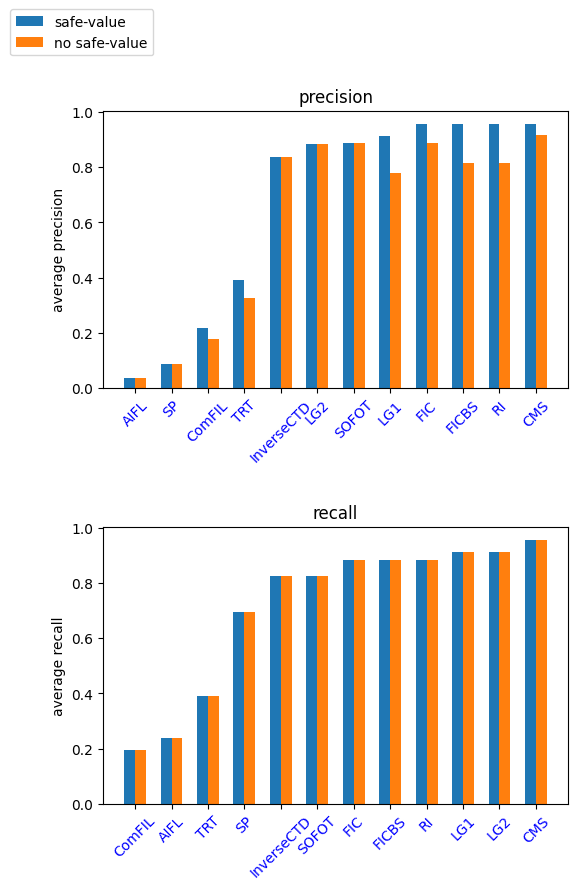

In [88]:
width = 0.3
labels = algo
x = np.arange(len(labels))
plt.rcParams['figure.figsize'] = (6, 9)
plt.subplot(2, 1, 1)
typ1 = plt.bar(x-width/2, SafePrecisionSequence, width)
typ2 = plt.bar(x+width/2, NoSafePrecisionSequence, width)
ax = plt.gca()

plt.xticks(x, SafePrecisionSequence.index)
for lobj in ax.get_xticklabels():
    lobj.set_rotation(45)
    lobj.set_size(10)
    lobj.set_color('blue')
plt.title("precision")
plt.ylabel('average precision')
plt.legend([typ1, typ2], ['safe-value', 'no safe-value'], loc=(-0.2,1.2))


plt.subplot(2, 1, 2)
typ1 = plt.bar(x-width/2, SafeRecallSequence, width)
typ2 = plt.bar(x+width/2, NoSafeRecallSequence, width)
ax = plt.gca()

plt.xticks(x, SafeRecallSequence.index)
for lobj in ax.get_xticklabels():
    lobj.set_rotation(45)
    lobj.set_size(10)
    lobj.set_color('blue')
plt.title("recall")
plt.ylabel('average recall')

plt.subplots_adjust(hspace=0.50)
plt.savefig('safe-value-impact.eps',dpi=400,format='eps', bbox_inches = 'tight')